In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import dabest

In [7]:
import dabest

In [ ]:
a = np.

In [2]:
q = np.random.poisson(25,100)
r = np.random.choice(q, int(q.size*0.5), replace=False) + 2.5

In [3]:
import scikits.bootstrap as boot

In [4]:
%matplotlib notebook

In [5]:
def  calc_delta_median(A,B):
    return np.nanmedian(A)-np.nanmedian(B)

In [62]:
## witht eh bias corrected intervals:
def extract_and_bca_deltamedianintervals(singlebat, multibat):
    '''
    Calculates observed Multi-Single median difference and the 95 %ile BCA confidence intervals.
    By default boot.ci performs 10,000 runs.
    Parameters
    ----------
    colnames : list
        List with column names
    singlebat, multibat : pd.DataFrame
        DataFrames with single and multibat data. 
    '''

    sample_size = np.max([singlebat.size,multibat.size])

    singledata = np.concatenate((singlebat, np.tile(np.nan, sample_size-singlebat.size))).flatten()
    multidata = np.concatenate((multibat, np.tile(np.nan, sample_size-multibat.size))).flatten()


    delta_bootstr_CI = ( np.nanmedian(multidata)-np.nanmedian(singledata),
                              boot.ci(( multidata, singledata),calc_delta_median))
    
    return delta_bootstr_CI

In [63]:
extract_and_bca_deltamedianintervals(q,r)

/home/tbeleyur/anaconda2/envs/mhbc/lib/python3.7/site-packages/ipykernel_launcher.py:21: InstabilityWarning: BCa acceleration values for indexes (array([0]),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
/home/tbeleyur/anaconda2/envs/mhbc/lib/python3.7/site-packages/ipykernel_launcher.py:21: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)


(2.5, array([-2.5, -2.5]))

In [9]:
pad_w_nans  = lambda X,Y : np.concatenate((np.tile(np.nan,Y.size-X.size),X))

In [12]:
df = pd.DataFrame(data={'one':q, 'two':pad_w_nans(r,q)})
df

,one,two
0,26,NaN
1,22,NaN
2,14,NaN
3,22,NaN
4,23,NaN
...,...,...
95,27,33.5
96,31,23.5
97,28,24.5
98,29,29.5


In [13]:
two_groups_unpaired = dabest.load(df, idx=("one", "two"), resamples=5000)

In [22]:
u = two_groups_unpaired.median_diff

In [27]:
u

DABEST v0.3.1
             
Good afternoon!
The current time is Fri Dec  4 14:59:23 2020.

The unpaired median difference between one and two is 2.0 [95%CI 0.0, 4.5].
The p-value of the two-sided permutation t-test is 0.008. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.median_diff.statistical_tests`

In [26]:
u.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_kruskal,statistic_kruskal
0,one,two,100,50,median difference,False,2.0,95,0.0,4.5,...,0.0,4.5,"(125, 4875)","[-1.5, -1.5, -1.5, -1.5, -1.5, -1.0, -1.0, -1....",5000,12345,0.008,5000,0.004062,8.255924


<IPython.core.display.Javascript object>


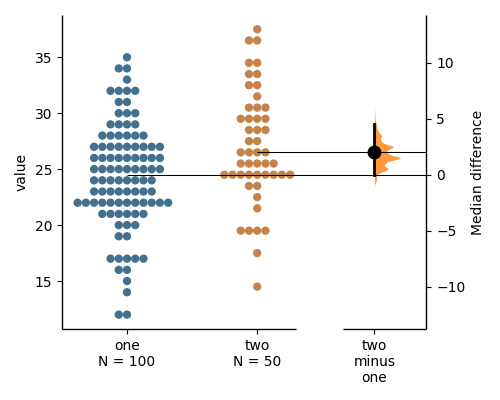

In [19]:
two_groups_unpaired.median_diff.plot();

<IPython.core.display.Javascript object>


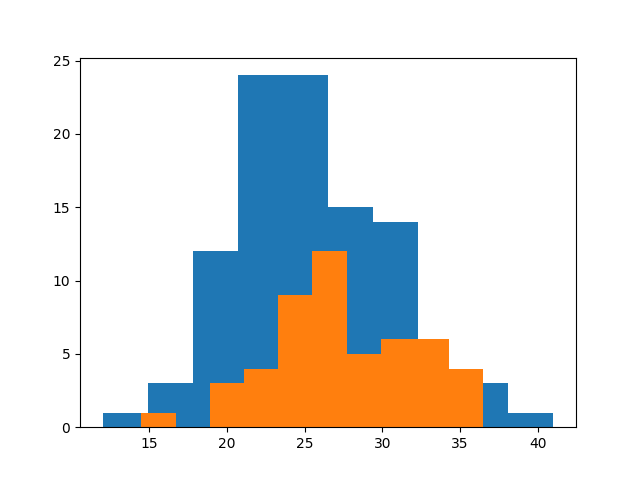

(array([ 1.,  0.,  3.,  4.,  9., 12.,  5.,  6.,  6.,  4.]),
 array([14.5, 16.7, 18.9, 21.1, 23.3, 25.5, 27.7, 29.9, 32.1, 34.3, 36.5]),
 <a list of 10 Patch objects>)

In [48]:
plt.figure()
plt.hist(q)
plt.hist(r)